In [63]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
import matplotlib.pyplot as plt
%matplotlib inline

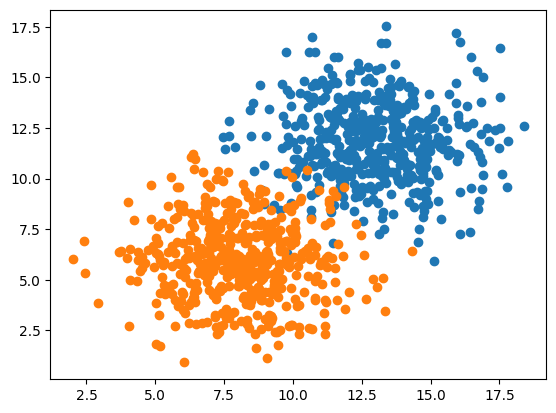

In [64]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [65]:
model=Sequential()
model.add(Dense(units = 1, input_shape=(2,), activation='sigmoid'))
adam=Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=Y, verbose=1, batch_size=50, epochs = 500, shuffle='true')#training things

Epoch 1/500
20/20 [==============================] - 0s 839us/step - loss: 3.5045 - accuracy: 0.4810
Epoch 2/500
20/20 [==============================] - 0s 787us/step - loss: 0.8545 - accuracy: 0.5410
Epoch 3/500
20/20 [==============================] - 0s 841us/step - loss: 0.6134 - accuracy: 0.6370
Epoch 4/500
20/20 [==============================] - 0s 841us/step - loss: 0.5259 - accuracy: 0.7320
Epoch 5/500
20/20 [==============================] - 0s 833us/step - loss: 0.4653 - accuracy: 0.8040
Epoch 6/500
20/20 [==============================] - 0s 841us/step - loss: 0.4092 - accuracy: 0.8560
Epoch 7/500
20/20 [==============================] - 0s 892us/step - loss: 0.3635 - accuracy: 0.9020
Epoch 8/500
20/20 [==============================] - 0s 892us/step - loss: 0.3297 - accuracy: 0.9160
Epoch 9/500
20/20 [==============================] - 0s 831us/step - loss: 0.2998 - accuracy: 0.9230
Epoch 10/500
20/20 [==============================] - 0s 892us/step - loss: 0.2733 - accura

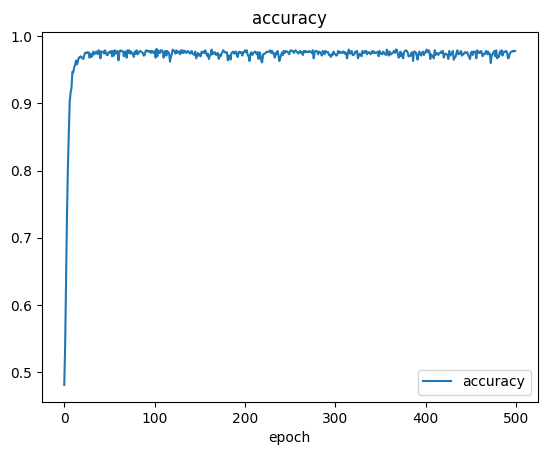

In [66]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

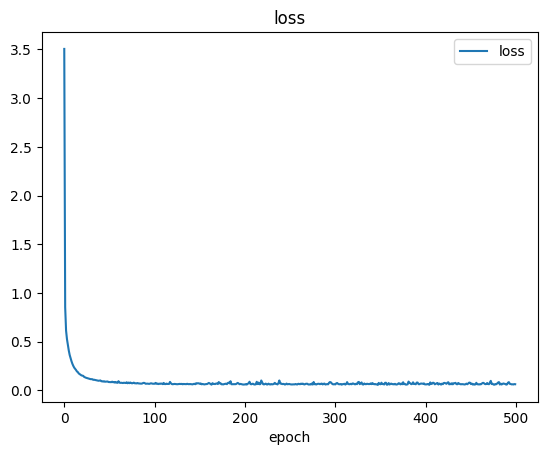

In [67]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [68]:
def plot_decision_boundary(X, Y, model):
    x_span=np.linspace(min(X[:, 0])-1, max(X[:, 0])+1)
    y_span=np.linspace(min(X[:, 1])-1, max(X[:, 1])+1)
    xx, yy=np.meshgrid(x_span, y_span)
    xx_, yy_=xx.ravel(), yy.ravel()
    grid=np.c_[xx_, yy_]
    pred_func=model.predict(grid)
    z=pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 1ms/step


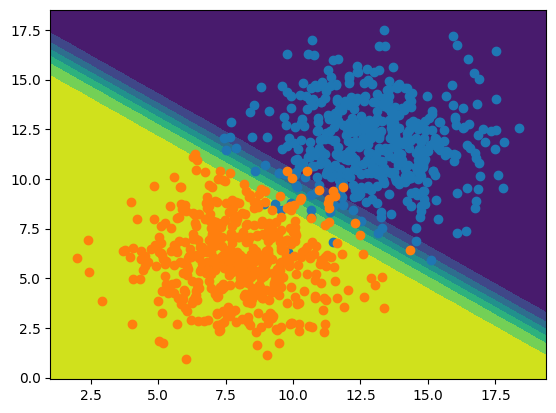

In [70]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 21ms/step
prediction is: [[0.9999928]]


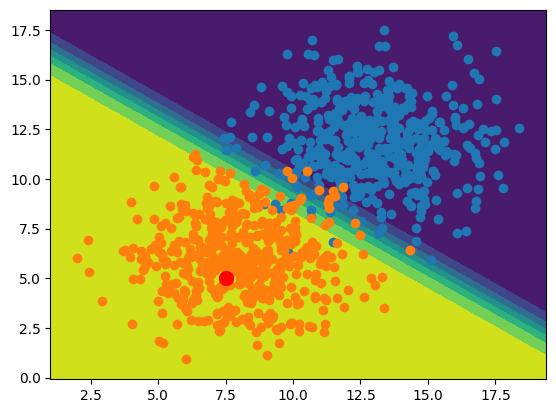

In [71]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="red")
print("prediction is:",prediction)